# Assignment 6

Due: **10:00 16 July 2024**

**Online submission** at via github classroom  

# 1. Interpolating a function of one variable **[25 points]**

Load the data in `sparse_1.dat`. You will try to find a smooth the data using interpolation.

**a)** Plot the data. Can you identify the trend? **5 points**

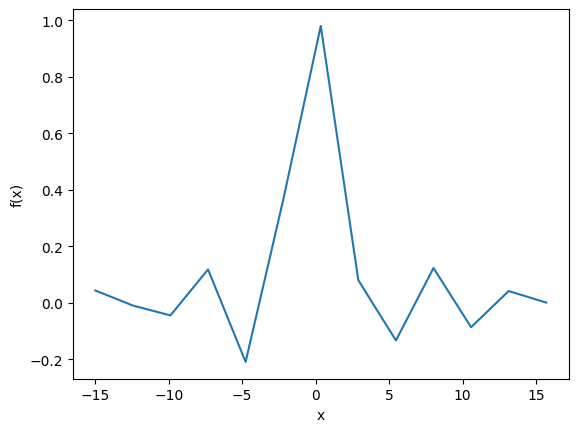

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Data/sparse_1.dat")

plt.plot(data[:,0],data[:,1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**b)** Smooth the data by interpolating the data at a larger number of $x$-coordinates. You can use the `interp1d` method in `scipy.interpolate` using the linear method (or interpolate the points manually). Plot your interpolated points with the original data points **10 points**

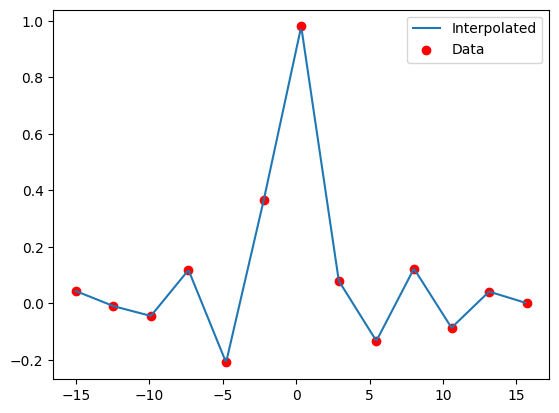

In [2]:
import scipy as sp

xx = np.arange(np.min(data[:,0]),np.max(data[:,0]),.1)

fitted = sp.interpolate.interp1d(data[:,0],data[:,1],kind = "linear")

plt.plot(xx,fitted(xx), label = "Interpolated")
plt.scatter(data[:,0],data[:,1], label = "Data",color = "red")
plt.legend()
plt.show()

**c)** Test a few other methods ('nearest', 'zero', 'slinear', 'quadratic', and 'cubic') to interpolate the data. Compare them to the linear method. Which appears to be most accurate? Can you identify the underlying function? **10 points**

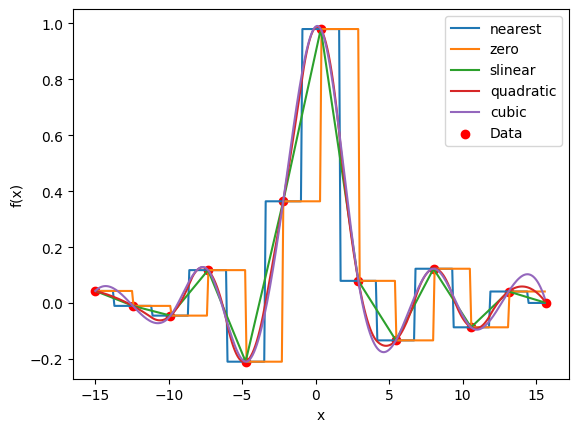

In [3]:
kinds = ["nearest","zero","slinear","quadratic","cubic"]

i = 0
while i < np.size(kinds):
    fitted = sp.interpolate.interp1d(data[:,0],data[:,1],kind = kinds[i])
    plt.plot(xx,fitted(xx),label = kinds[i])
    i += 1

plt.scatter(data[:,0],data[:,1],label = "Data", color = "red")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

The linear method makes simple lines between the point. Zero and nearest is not really accurate while quadratic and cubic both do a well representation. The cubic interpolation seems to overshoot between points. 

# 2. Using cubic spline for a function of two variables **[25 points]**

Load the data in `data_2.dat`. It contains data in 3 dimensions, where the third dimension is a step function depending on position of the first two.

**a)** The data itself is well-sampled. Verify this by plotting it. **5 points**

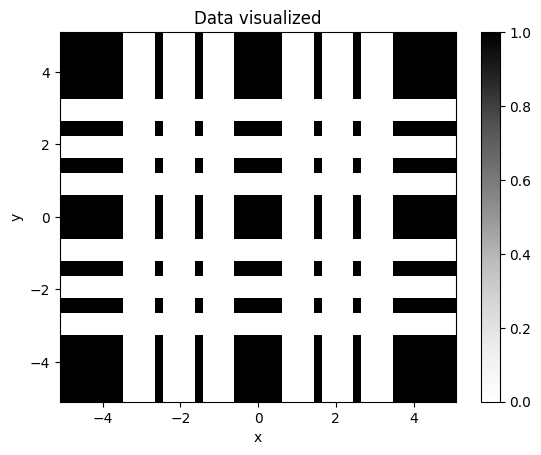

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Data/data_2.dat")

x = data[:,0]

x = x.reshape([50,50])

y = data[:,1]

y= y.reshape([50,50])

z = data[:,2]

z = z.reshape([50,50])

plt.pcolormesh(x,y,z,cmap="Greys")
plt.title("Data visualized")
plt.xlabel("x")
plt.colorbar()
plt.ylabel("y")
plt.show()


**b)** Now compare the various methods of interpolation using `interp2d()` from `scipy.interpolate` ('linear', 'cubic', 'quintic') by plotting the resulting interpolated grids. Which is the most-accurate method? What are the pros/cons to each method? **20 points**

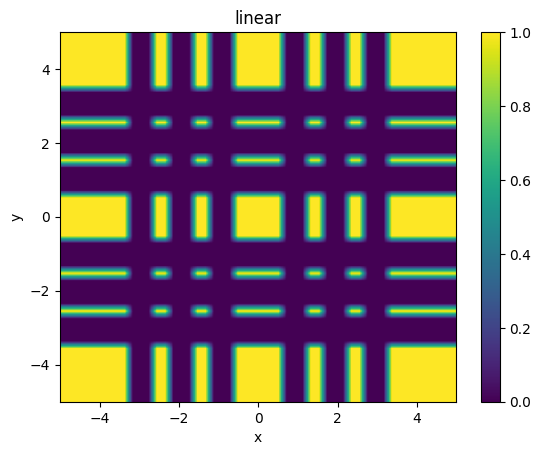

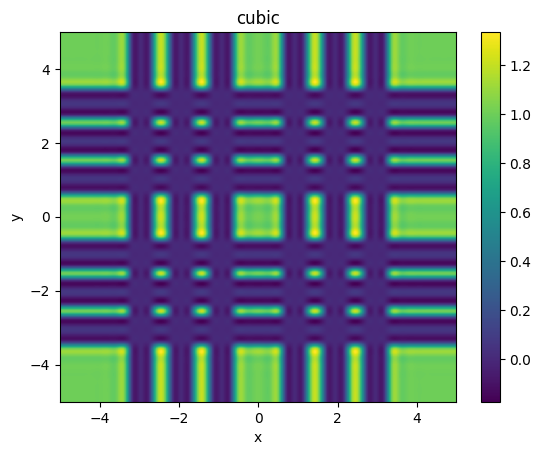

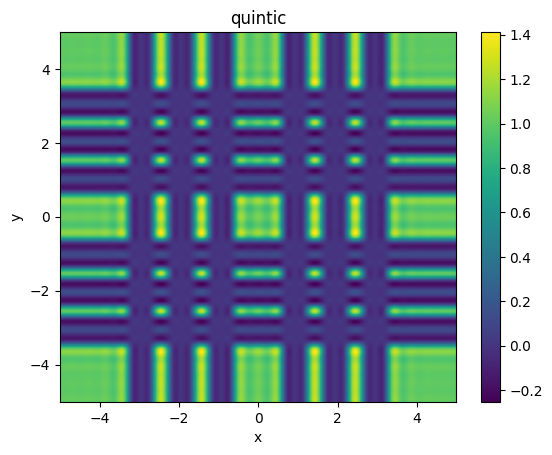

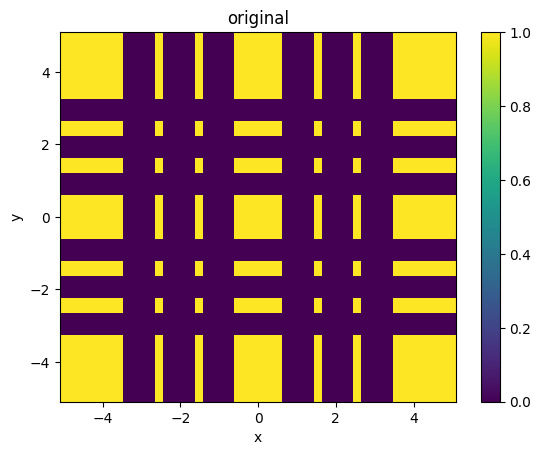

In [5]:
import scipy as sp

kinds = ["linear","cubic","quintic"]

xx = np.arange(np.min(x[0,:]),np.max(x[0,:]),.01)
yy = xx
xx,yy = np.meshgrid(xx,yy)

i = 0
while i < np.size(kinds):
    fitted = sp.interpolate.RegularGridInterpolator(points=(x[0,:],y[:,0]),values = z,method = kinds[i])
    plt.pcolormesh(xx,yy,fitted((xx,yy)))
    plt.title(kinds[i])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar()
    plt.show()
    i += 1
plt.pcolormesh(x,y,z)
plt.title("original")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The linear method seems to generate the mos precise solution. quintic seems to be the worst, while cubic seems to be moderate.

# 3. Smoothing a noisy signal **[50 points]**

Load the data in `data_noisy.dat`. Here you will find columns for $x$, $y_1$, and $y_2$. You will investigate how well the data can be smoothed using different filters.

**a)** Apply a moving-average filter to both datasets with $10$- and $20$-point filters. Compare this to $10$- and $20$-point triangular smoothing of both datasets. Discuss the difference between these methods, and how accurate is the interpolated data. Plot any filtered data with the original dataset. **20 points**

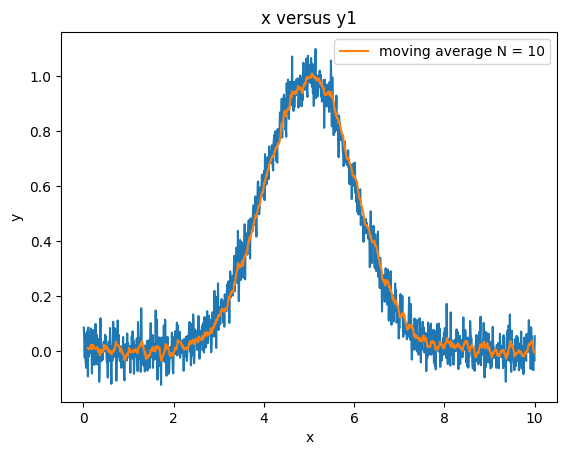

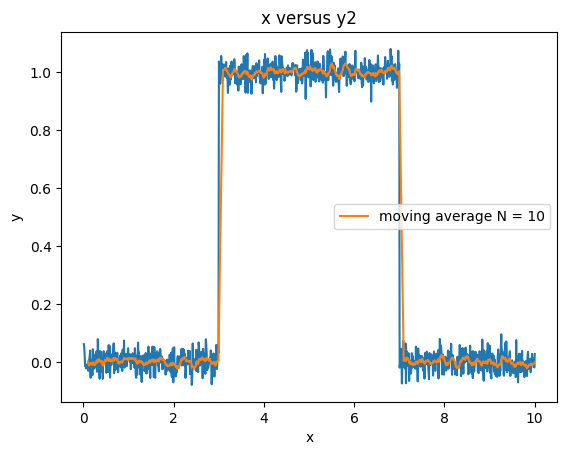

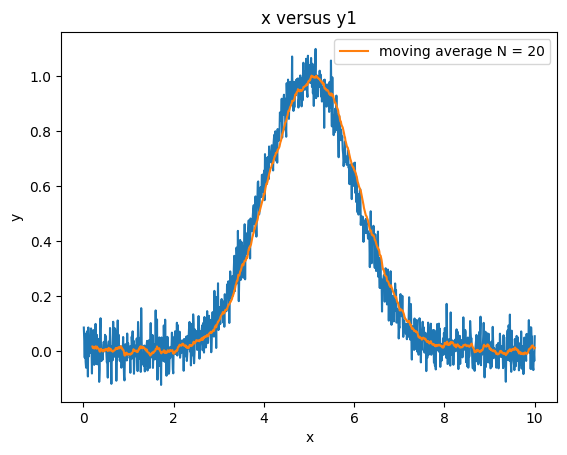

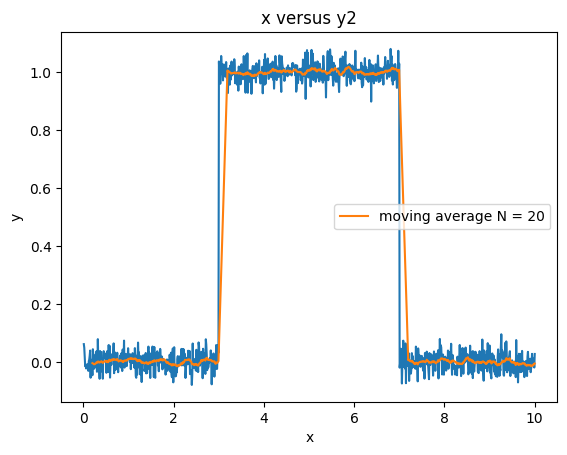

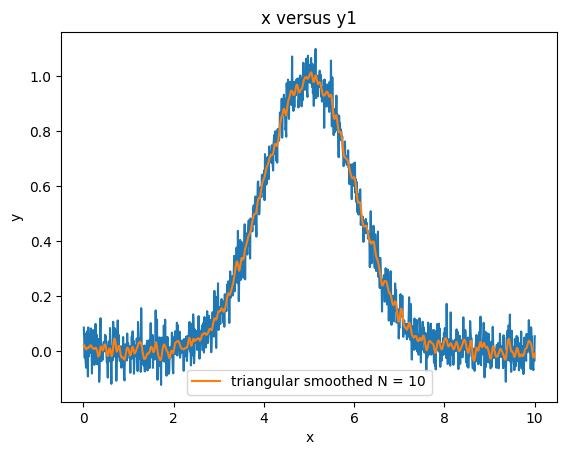

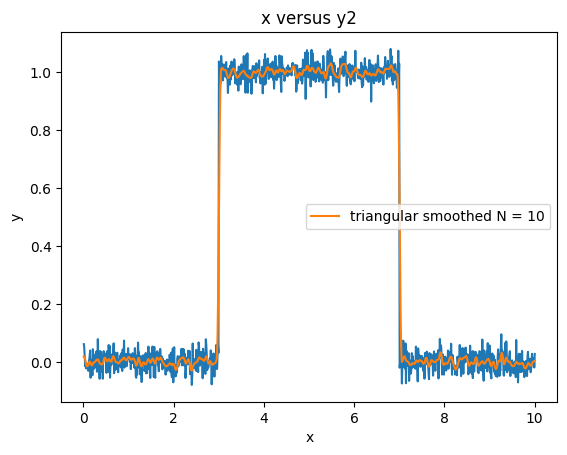

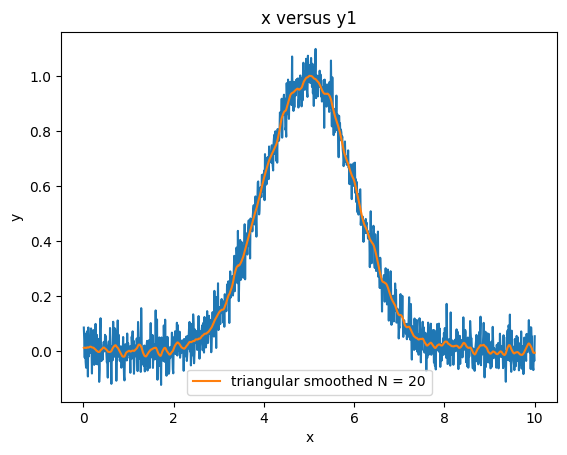

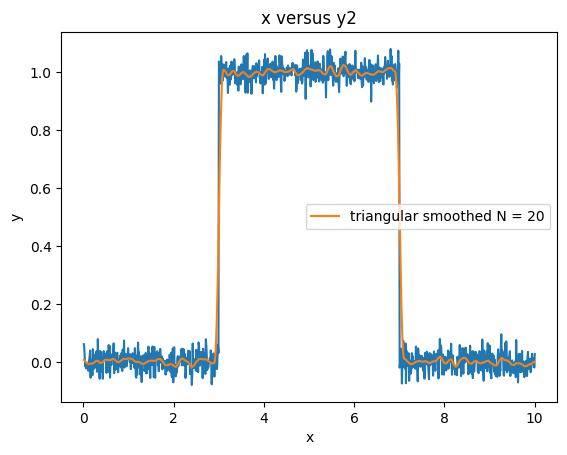

In [32]:
# use scipy convolution
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


input = np.loadtxt("Data/data_noisy.dat")
data = {
    "x" : input[1:,0],
    "y1" : input[1:,1],
    "y2" : input[1:,2]
}

df = pd.DataFrame(data)
def mov_avg(inp,N):
    df['y1_moving_avg'] = df['y1'].rolling(window=N).mean()
    df['y2_moving_avg'] = df['y2'].rolling(window=N).mean()
    return df

mov_avg(df,10)


plt.plot(df["x"],df["y1"])
plt.plot(df["x"],df['y1_moving_avg'],label="moving average N = 10")
plt.title("x versus y1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(df["x"],df["y2"])
plt.plot(df["x"],df['y2_moving_avg'],label="moving average N = 10")
plt.title("x versus y2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

mov_avg(df,20)

plt.plot(df["x"],df["y1"])
plt.plot(df["x"],df['y1_moving_avg'],label="moving average N = 20")
plt.title("x versus y1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(df["x"],df["y2"])
plt.plot(df["x"],df['y2_moving_avg'],label="moving average N = 20")
plt.title("x versus y2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

def triangular_window(M):
    return np.array([1 - abs((i - (M - 1) / 2) / (M / 2)) for i in range(M)])

def normalize_window(window):
    return window / window.sum()

def triangular_smooth(data, window_size):
    window = triangular_window(window_size)
    window = normalize_window(window)
    return np.convolve(data, window, mode='same')

df['y1_smoothed'] = triangular_smooth(df['y1'], 10)
df['y2_smoothed'] = triangular_smooth(df['y2'], 10)

plt.plot(df["x"],df["y1"])
plt.plot(df["x"],df['y1_smoothed'],label="triangular smoothed N = 10")
plt.title("x versus y1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(df["x"],df["y2"])
plt.plot(df["x"],df['y2_smoothed'],label="triangular smoothed N = 10")
plt.title("x versus y2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

df['y1_smoothed'] = triangular_smooth(df['y1'], 20)
df['y2_smoothed'] = triangular_smooth(df['y2'], 20)

plt.plot(df["x"],df["y1"])
plt.plot(df["x"],df['y1_smoothed'],label="triangular smoothed N = 20")
plt.title("x versus y1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(df["x"],df["y2"])
plt.plot(df["x"],df['y2_smoothed'],label="triangular smoothed N = 20")
plt.title("x versus y2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


It seems that performing triangular smoothing does work well when using a window size of 20. The Data appears to be smoother than before. Applying the moving average leads to issues with missing values. Also the y2 data is shifted in x-direction. Perhaps it underestimates x values.

**b)** Apply the Savitzky-Golay filter to both datasets and plot them. How does this method compare to the previous ones? **30 points**

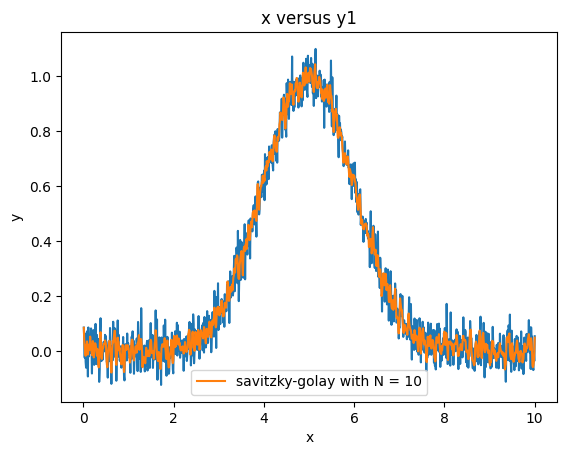

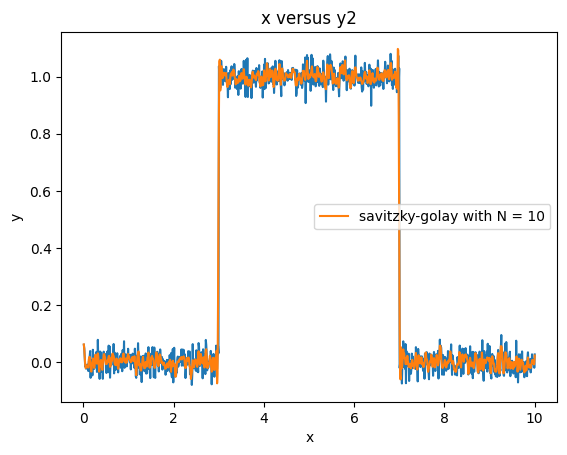

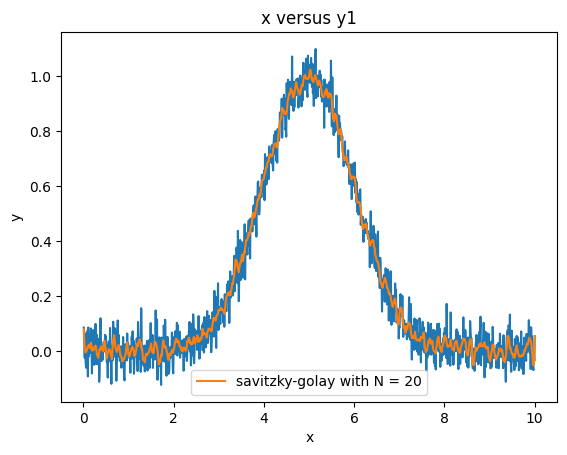

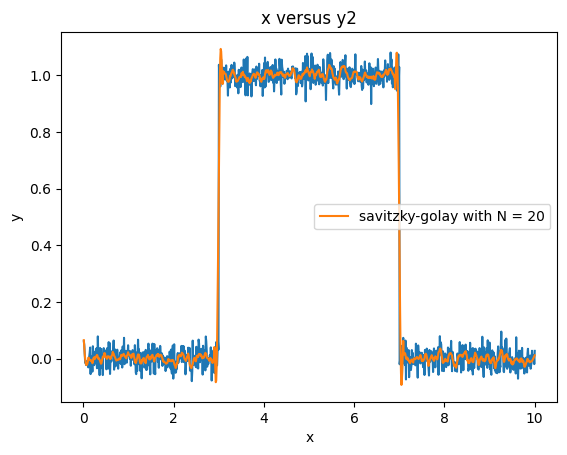

In [31]:
from scipy import signal

df["y1_sg"]=signal.savgol_filter(df["y1"],10,polyorder=5)
df["y2_sg"] = signal.savgol_filter(df["y2"],10,polyorder=5)

plt.plot(df["x"],df["y1"])
plt.title("x versus y1")
plt.plot(df["x"],df["y1_sg"],label="savitzky-golay with N = 10")
plt.xlabel("x")
plt.legend()
plt.ylabel("y")
plt.show()

plt.plot(df["x"],df["y2"])
plt.title("x versus y2")
plt.plot(df["x"],df["y2_sg"],label="savitzky-golay with N = 10")
plt.xlabel("x")
plt.legend()
plt.ylabel("y")
plt.show()

df["y1_sg"]=signal.savgol_filter(df["y1"],20,polyorder=5)
df["y2_sg"] = signal.savgol_filter(df["y2"],20,polyorder=5)

plt.plot(df["x"],df["y1"])
plt.title("x versus y1")
plt.plot(df["x"],df["y1_sg"],label="savitzky-golay with N = 20")
plt.xlabel("x")
plt.legend()
plt.ylabel("y")
plt.show()

plt.plot(df["x"],df["y2"])
plt.title("x versus y2")
plt.plot(df["x"],df["y2_sg"],label="savitzky-golay with N = 20")
plt.xlabel("x")
plt.legend()
plt.ylabel("y")
plt.show()


This method seems to be quite accurate in smoothing when using 20 points for window size. One should definetly use higher numbers of points to achieve a better smoothing. The moving average and the triangular smoothing still can compete with the savitky-golar filter. I chose fifth order polynomials for this task. Adjusting the filter will eventually increase the smoothing.